In [48]:
# Necessary Packages 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [1]:
# Specify directories 
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"
temp_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/temp"


In [62]:
long_run_avg = pd.read_csv(f"{output_dir}/data/shimer_long_run_avg_rates.csv")
data = pd.read_stata(f"{temp_dir}/shimer_macro_flows.dta")

In [63]:
data = data.rename(columns = {'date_monthly':'date','eu_rate':'seperation_rate', 'ue_rate':'job_finding_rate'})

In [64]:
data

,YEAR,MONTH,date,emp_stock,unemp_stock,short_unemp_stock,emp_stock_next,unemp_stock_next,short_unemp_stock_next,job_finding_rate,ue_rate_ma3,seperation_rate,eu_rate_ma3,u_rate
0,2016,1,2016-01-01,100210992.0,4806622.00,1.360563e+06,100590304.0,4664690.50,1.084066e+06,0.255064,0.249784,0.012399,0.014380,0.054435
1,2016,2,2016-02-01,100590304.0,4664690.50,1.084066e+06,101029088.0,4635007.00,1.136710e+06,0.250047,0.243646,0.012915,0.013543,0.052657
2,2016,3,2016-03-01,101029088.0,4635007.00,1.136710e+06,101123584.0,4269753.00,1.137626e+06,0.324246,0.276452,0.013439,0.012918,0.044641
3,2016,4,2016-04-01,101123584.0,4269753.00,1.137626e+06,101412376.0,3984266.50,1.025191e+06,0.306968,0.293754,0.011976,0.012777,0.041682
4,2016,5,2016-05-01,101412376.0,3984266.50,1.025191e+06,100842184.0,4241145.50,1.420336e+06,0.292013,0.307742,0.016400,0.013938,0.043330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2024,2,2024-02-01,106393136.0,3995140.75,1.292686e+06,106619600.0,3769605.50,1.047494e+06,0.318644,0.298557,0.011711,0.013823,0.044250
98,2024,3,2024-03-01,106619600.0,3769605.50,1.047494e+06,106906536.0,3368020.50,1.037021e+06,0.381633,0.342227,0.012020,0.012776,0.035989
99,2024,4,2024-04-01,106906536.0,3368020.50,1.037021e+06,107039576.0,3371037.50,1.145233e+06,0.339136,0.346471,0.012900,0.012210,0.034042
100,2024,5,2024-05-01,107039576.0,3371037.50,1.145233e+06,106379032.0,3822582.75,1.296740e+06,0.250722,0.323830,0.013851,0.012924,0.038377


In [65]:
data_21_present = data[data['date'] >= '2021-01-01'].reset_index(drop=True)

In [66]:
long_run_avg

,avg_job_finding,avg_job_destruction_rate
0,0.44086,0.03545


In [67]:
data_21_present['avg_seperation_rate'] = long_run_avg['avg_job_destruction_rate'][0]
data_21_present['avg_job_finding_rate'] = long_run_avg['avg_job_finding'][0]

In [68]:
data_21_present['u_rate_job_finding'] =  data_21_present['avg_seperation_rate'] / (data_21_present['avg_seperation_rate']  + data_21_present['job_finding_rate'])
data_21_present['u_rate_job_destruction'] = data_21_present['seperation_rate'] / (data_21_present['seperation_rate'] + data_21_present['avg_job_finding_rate'])

In [69]:
data_21_present['date'] = pd.to_datetime(data_21_present['date']) 

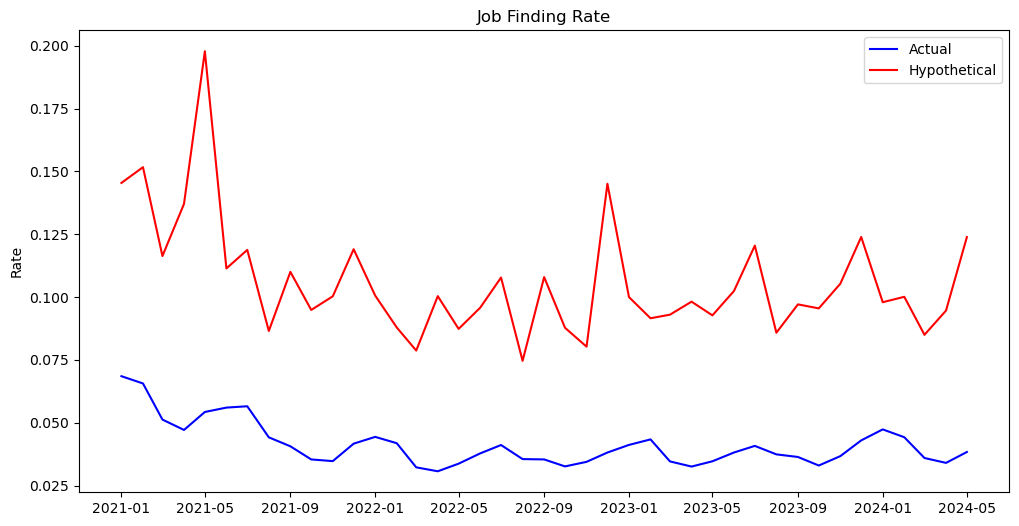

In [70]:
# Create the plot 
plt.figure(figsize=(12, 6)) 
    
# Plot both lines
plt.plot(data_21_present['date'], data_21_present['u_rate'], label='Actual', color='blue')
plt.plot(data_21_present['date'], data_21_present['u_rate_job_finding'], label='Hypothetical', color='red')
    
# Customize the plot
plt.title('Job Finding Rate')
plt.ylabel('Rate')
plt.legend()
plt.savefig(f"{output_dir}/figures/u_rate_comparison_job_finding_post.pdf", bbox_inches='tight')
#plt.ylim(.03, .08)
plt.show()

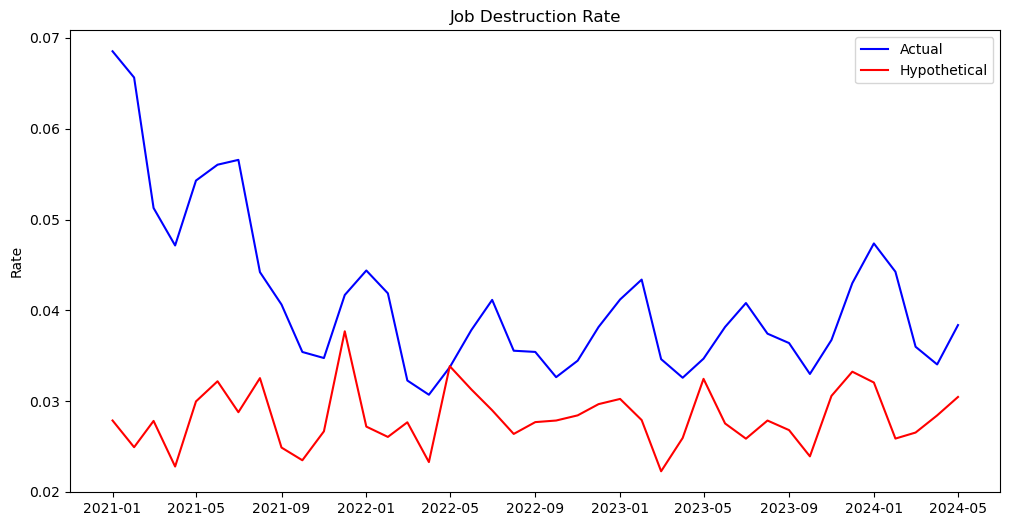

In [71]:
# Create the plot 
plt.figure(figsize=(12, 6)) 
    
# Plot both lines
plt.plot(data_21_present['date'], data_21_present['u_rate'], label='Actual', color='blue')
plt.plot(data_21_present['date'], data_21_present['u_rate_job_destruction'], label='Hypothetical', color='red')
    
# Customize the plot
plt.title('Job Destruction Rate')
plt.ylabel('Rate')
plt.legend()
plt.savefig(f"{output_dir}/figures/u_rate_comparison_job_destruction_post.pdf", bbox_inches='tight')
plt.show()